## Final Project Submission

Please fill out:
* Student name: Jonah Flateman
* Student pace: self paced
* Scheduled project review date/time: 6/2/21 11:00am
* Instructor name: Jeff Herman
* Blog post URL: https://jonahflateman.github.io/churn_in_telecoms_dataset_the_right_questions


# Importing, Cleaning, and EDA

Listed below are the libraries we will be using throughout the EDA and modeling processes.

In [1]:
#Importing libraries to be used
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score, plot_confusion_matrix, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.utils import _safe_indexing
sys.modules['sklearn.utils.safe_indexing'] = sklearn.utils._safe_indexing
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import decomposition
from lime import lime_tabular

In [2]:
#Importing CSV file as DataFrame
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
#Displaying first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Column info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#Looking at values of churn column
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

We should note the class imblanace as something to remember when modeling.

In [6]:
#Checking for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#Checking column statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
#Looking at values for selected columns in further detail
df['account length'].value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64

In [9]:
df['number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64

In [10]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [11]:
#Churn rate, for reference
churn_rate = sum(df['churn']) / len(df['churn'])
churn_rate

0.14491449144914492

This is helpfully quite a clean dataset, we will drop the phone number column and change our binary columns to have numeric values.

In [12]:
#Dropping phone number column
df.drop(columns=['phone number'], inplace=True)

In [13]:
#Replacing binary column variables with 0 or 1
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)

Text(0.5, 1.0, 'Effect of Customer Service Calls on Churn Rate')

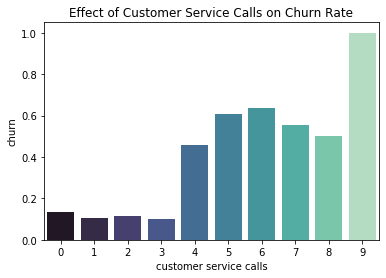

In [14]:
#Looking at customer service data in relation to churn
sns.barplot(x='customer service calls', y='churn',
                    data=df, palette='mako', ci=None).set_title('Effect of Customer Service Calls on Churn Rate')

Text(0.5, 1.0, 'Effect of Customer Service Calls on Churn Rate')

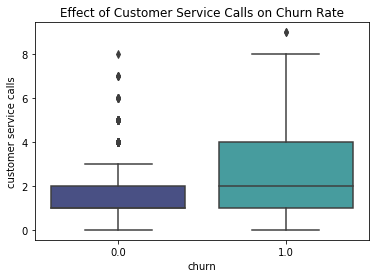

In [15]:
sns.boxplot(x='churn', y='customer service calls',
              data=df, palette='mako').set_title('Effect of Customer Service Calls on Churn Rate')

Looking at value counts for customer service calls above made me want to plot out some of this data.  We see that churn rate rises steeply especially at four or more calls.

Let's create new columns for total minutes and calls and see how they compare.

In [16]:
#Adding new columns for total minutes and calls to plot
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

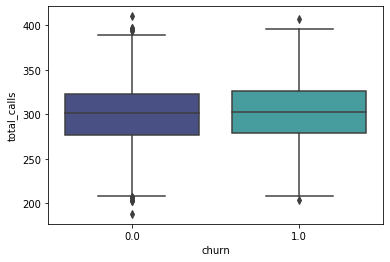

In [17]:
sns.boxplot(x='churn', y='total_calls',
              data=df, palette='mako')

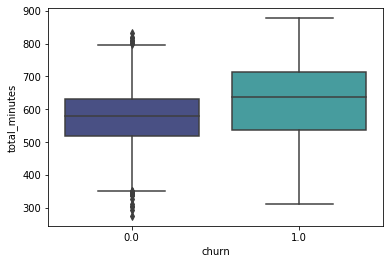

In [18]:
sns.boxplot(x='churn', y='total_minutes',
              data=df, palette='mako')

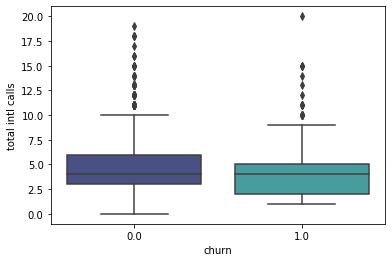

In [19]:
sns.boxplot(x='churn', y='total intl calls',
              data=df, palette='mako')

Number of calls doesn't seem to have as much of an effect as number of minutes, however users who make more international calls seem to have more customer loyalty.

In [20]:
#Looking at median charges per call
charges = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']
for charge, call in zip(charges, calls):
    print((df[charge] / df[call]).median())

0.3044545454545455
0.1687546152710087
0.0902803738317757
0.6639999999999999


It makes sense that our international rates are higher - depending on how later models value feature importance, we may want to recommend rate adjustments depending on time of day.

In [21]:
#Looking at churn rate by state
state_churn = df.groupby('state')['churn'].value_counts(normalize=True)
state_churn = pd.DataFrame(state_churn)
state_churn.columns = ['amount']
state_churn = state_churn.reset_index()

Text(0.5, 1, 'Churn Rate by State')

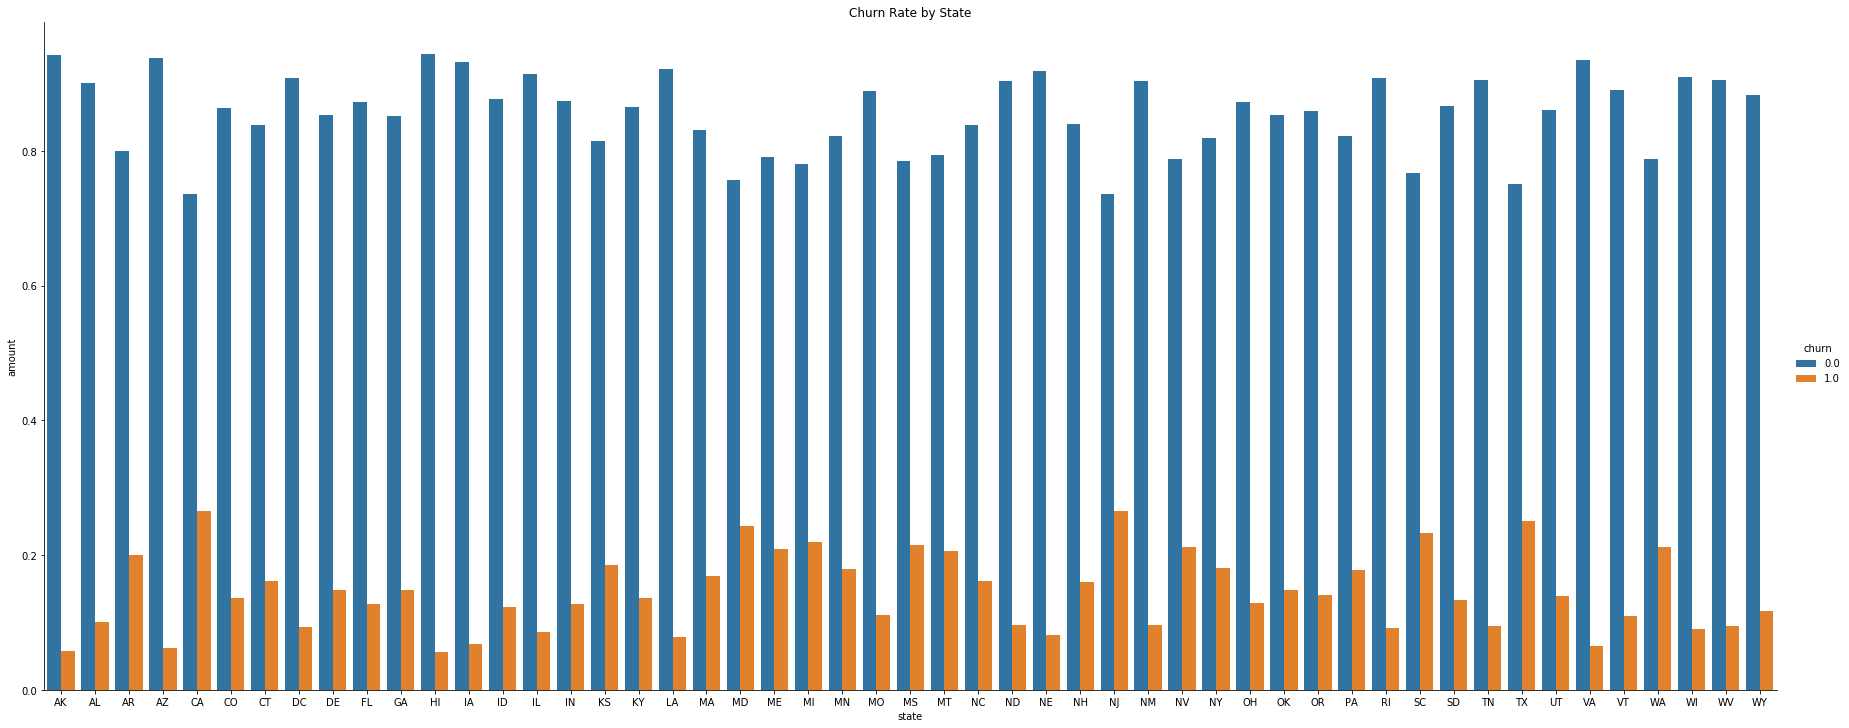

In [22]:
sns.catplot(data=state_churn, kind='bar', x='state', y='amount', hue='churn', aspect=2.5, height=10)
plt.title('Churn Rate by State')

The above plot lists our churn rates by state; we can see that certain states (California, New Jersey, Texas) have particularly high churn rates and will explore the effect that this may or may not have in modeling.

# Modeling

### Baseline Model 

For the time being, we will drop our state and area code columns and make a baseline model.  We will be using a scaled Random Forest model with Pipeline to help us calculate our ROC/AUC score with scikit-learn.

In [23]:
#Dropping state and area code columns for modeling
new_df = df.drop(columns=['state', 'area code'], axis=1)

In [24]:
#Creating predictor and target variables
X = new_df.drop(columns=['churn'], axis=1)
y = new_df.churn

In [25]:
scaler = RobustScaler()

In [26]:
RF = RandomForestClassifier()

In [27]:
#Building pipeline with scaled data and RandomForestClassifier
pipeline = make_pipeline(scaler, RF)

In [28]:
#Creating train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,  random_state=42)

In [29]:
#Fitting the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [30]:
#Saving predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

In [31]:
#Looking at roc_auc_scores
train_score = roc_auc_score(y_train, train_pred)
test_score = roc_auc_score(y_test, test_pred)

In [32]:
train_score

1.0

In [33]:
test_score

0.8698843441466855

To avoid overfitting, we can use GridSearch to help with finding the best parameters.

In [34]:
#Setting GridSearch parameters
grid_param = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 3, 5]
              } 

In [35]:
#GridSearch fit. WARNING - this takes time to run.
grid_search = GridSearchCV(RF, grid_param, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [36]:
#Identifying best GridSearch parameters and using best estimator method to re-fit model
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [37]:
RF_best = grid_search.best_estimator_

In [38]:
RF_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_split=5, n_estimators=50)

In [39]:
train_pred2 = RF_best.predict(X_train)
test_pred2 = RF_best.predict(X_test)

In [40]:
train_score2 = roc_auc_score(y_train, train_pred2)

In [41]:
test_score2 = roc_auc_score(y_test, test_pred2)

In [42]:
train_score2

0.9206063318190476

In [43]:
test_score2

0.9002425952045133

These scores look more consistent, but because this is a binary classification problem a confusion matrix will come in handy.

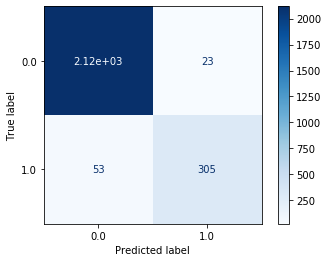

In [44]:
#Plotting confusion matrices for train and test sets
plot_confusion_matrix(RF_best, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

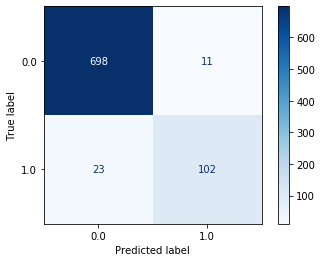

In [45]:
plot_confusion_matrix(RF_best, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

Plotting our feature importances as below, customer service calls and day rates/minutes are relatively highest in importance.  From a business perspective, we can be thinking about what can be done to lower the number of calls or possible adjust rates to avoid churn.

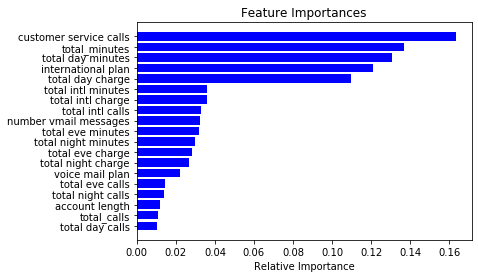

In [46]:
features = X_train.columns
importances = RF_best.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We are attempting to predict churn from our dataset, and will be most interested in recall - accurately identifying our positives.  Misidentifying a customer as someone who will churn is not ideal, but the opposite - missing a customer who will churn - is much worse for this business problem. 

In [47]:
#Creating reference function for metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [48]:
print_metrics(y_train, train_pred2)

Precision Score: 0.9298780487804879
Recall Score: 0.8519553072625698
Accuracy Score: 0.9695878351340537
F1 Score: 0.8892128279883382


In [49]:
print_metrics(y_test, test_pred2)

Precision Score: 0.9026548672566371
Recall Score: 0.816
Accuracy Score: 0.9592326139088729
F1 Score: 0.8571428571428571


This model works fairly well with recall, we will continue testing and return later on in the process.

### Logistic Regression

In [50]:
#Using PCA for dimensionality reduction
pca = decomposition.PCA()

In [51]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

In [52]:
pipeline = Pipeline(steps=[('pca', pca), ('logreg', logreg)])

In [53]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, solver='liblinear'))])

In [54]:
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

In [55]:
train_score_3 = roc_auc_score(y_train, train_preds)
test_score_3 = roc_auc_score(y_test, test_preds)

In [56]:
train_score_3

0.7461688398101447

In [57]:
test_score_3

0.7608744710860367

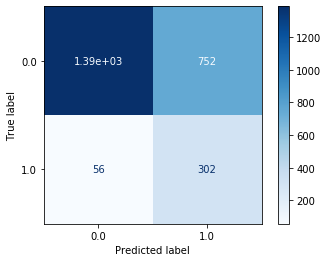

In [58]:
plot_confusion_matrix(pipeline, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

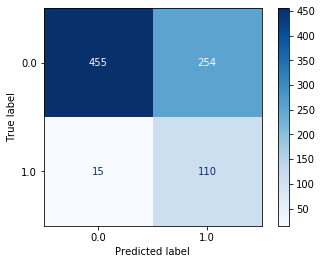

In [59]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

This model produces few false negatives, however the increasingly larger number of false positives does not compare well enough to our Random Forest model to pursue in this case.

### Gradient Boosting and AdaBoost

In [60]:
gbt_clf = GradientBoostingClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(random_state=42)

In [61]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [62]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [63]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [64]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [65]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9967213114754099
Recall Score: 0.8491620111731844
Accuracy Score: 0.9779911964785915
F1 Score: 0.9170437405731523


In [66]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.7531380753138075
Recall Score: 0.5027932960893855
Accuracy Score: 0.9051620648259304
F1 Score: 0.6030150753768845


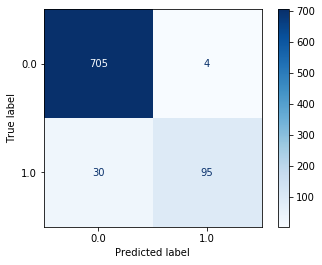

In [67]:
plot_confusion_matrix(gbt_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

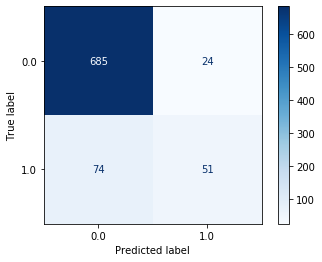

In [68]:
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

Gradient Boosting works quite well here in precision and its recall is comparable to our Random Forest model.

### K-Nearest Neighbors

In [69]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
knn_clf_train_preds = knn_clf.predict(X_train)
knn_clf_test_preds = knn_clf.predict(X_test)

In [71]:
print_metrics(y_train, knn_clf_train_preds)

Precision Score: 0.8291139240506329
Recall Score: 0.3659217877094972
Accuracy Score: 0.898359343737495
F1 Score: 0.5077519379844961


In [72]:
print_metrics(y_test, knn_clf_test_preds)

Precision Score: 0.6896551724137931
Recall Score: 0.32
Accuracy Score: 0.8764988009592326
F1 Score: 0.4371584699453552


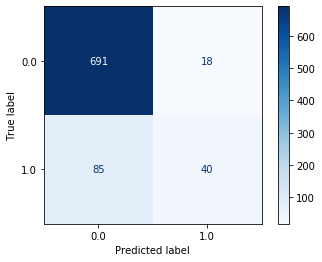

In [73]:
plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

In [74]:
#Creating function to find best k value if helpful
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

In [75]:
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
Recall: 0.384


Our K-Nearest Neighbors model performed relatively poorly despite a slight increase in recall using our find_best_k function.

In [76]:
#Function to display key metrics of more successful models
def display_acc_and_roc_auc_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    roc_auc = roc_auc_score(true, preds)
    recall = recall_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("ROC AUC Score: {}".format(roc_auc))
    print("Recall: {}".format(recall))
    
print("Training Metrics")
display_acc_and_roc_auc_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_roc_auc_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_roc_auc_score(y_train, train_pred2, model_name='Random Forest Classifier')
print("")
print("Testing Metrics")
display_acc_and_roc_auc_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_roc_auc_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_roc_auc_score(y_test, test_pred2, model_name='Random Forest Classifier')

Training Metrics
Model: AdaBoost
Accuracy: 0.9051620648259304
ROC AUC Score: 0.7376180399176492
Recall: 0.5027932960893855

Model: Gradient Boosted Trees
Accuracy: 0.9779911964785915
ROC AUC Score: 0.9243474698556252
Recall: 0.8491620111731844

Model: Random Forest Classifier
Accuracy: 0.9695878351340537
ROC AUC Score: 0.9206063318190476
Recall: 0.8519553072625698

Testing Metrics
Model: AdaBoost
Accuracy: 0.882494004796163
ROC AUC Score: 0.6870747531734839
Recall: 0.408

Model: Gradient Boosted Trees
Accuracy: 0.9592326139088729
ROC AUC Score: 0.877179125528914
Recall: 0.76

Model: Random Forest Classifier
Accuracy: 0.9592326139088729
ROC AUC Score: 0.9002425952045133
Recall: 0.816


Looking at a summary of our better-performing models, Gradient Boosting and Random Forest stand out above AdaBoost.  Let's see how we can tune these two remaining models to improve performance.

## Bringing Back Area Code/State and One Hot Encoding

We had removed both area code and state for our initial model, let's create dummy variables for these for our next iteration of the Random Forest model.

In [77]:
#Creating dummy variables for state and area code
one_hot_df = pd.get_dummies(data=df, columns=['state', 'area code'], drop_first=True)

In [78]:
one_hot_df.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'total_minutes',
       'total_calls', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI',
       'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN'

In [79]:
one_hot_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


In [80]:
X = one_hot_df.drop(columns=['churn'], axis=1)
y = one_hot_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,  random_state=42 )

### Random Forest Baseline (One Hot)

In [81]:
RF = RandomForestClassifier()
grid_param = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 3, 5]
              } 
grid_search = GridSearchCV(RF, grid_param, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [82]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [83]:
RF_best = grid_search.best_estimator_
RF_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=3, min_samples_split=5)

In [84]:
train_pred2 = RF_best.predict(X_train)
test_pred2 = RF_best.predict(X_test)

In [85]:
train_score2 = roc_auc_score(y_train, train_pred2)
test_score2 = roc_auc_score(y_test, test_pred2)

In [86]:
train_score2

0.9145344028139099

In [87]:
test_score2

0.8811904090267983

In [88]:
print_metrics(y_train, train_pred2)

Precision Score: 0.8615819209039548
Recall Score: 0.8519553072625698
Accuracy Score: 0.9591836734693877
F1 Score: 0.8567415730337078


In [89]:
print_metrics(y_test, test_pred2)

Precision Score: 0.825
Recall Score: 0.792
Accuracy Score: 0.9436450839328537
F1 Score: 0.8081632653061225


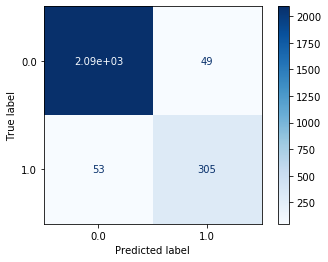

In [90]:
plot_confusion_matrix(RF_best, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

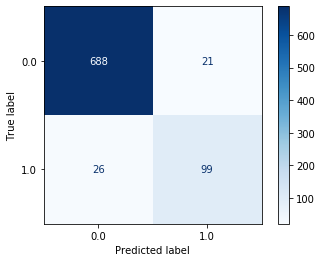

In [91]:
plot_confusion_matrix(RF_best, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

Our recall has stayed relatively the same however precision has improved on the baseline model.

In [92]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['no churn', 'churn'],
    mode='classification'
)

In [93]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[2], 
    predict_fn=RF_best.predict_proba
)

In [94]:
exp.show_in_notebook(show_table=True)

We can use LIME to look at individual cases and visualize the feature importances' contributions to "bad" (churn) or "good" (no churn).

### Gradient Boosting (One Hot)

In [95]:
gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [96]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [97]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.993421052631579
Recall Score: 0.8435754189944135
Accuracy Score: 0.9767907162865146
F1 Score: 0.9123867069486405


In [98]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.96875
Recall Score: 0.744
Accuracy Score: 0.9580335731414868
F1 Score: 0.8416289592760181


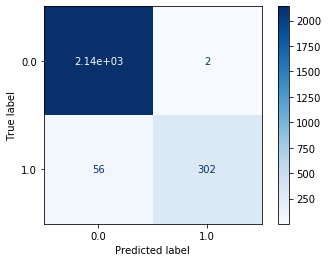

In [99]:
plot_confusion_matrix(gbt_clf, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

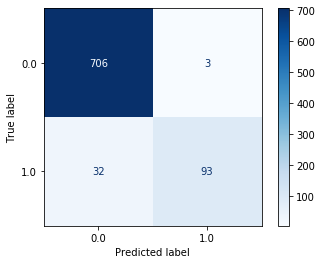

In [100]:
plot_confusion_matrix(gbt_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

Our dummy variables again help reduce false positives while false negatives remain comparable to the previous model. Let's try using SMOTE to balance our data.

### Gradient Boosting with SMOTE and Pipeline

In [101]:
X = new_df.drop(columns=['churn'], axis=1)
y = new_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,  random_state=42 )
smote = SMOTE()
gbt_clf = GradientBoostingClassifier()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
gbt_clf.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [102]:
pipeline = make_pipeline(smote, gbt_clf)

In [103]:
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('smote', SMOTE()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [104]:
pipeline.score(X_test, y_test)

0.9580335731414868

In [105]:
pipeline_train_preds = pipeline.predict(X_train_resampled)
pipeline_test_preds = pipeline.predict(X_test)

In [106]:
print_metrics(y_train_resampled, pipeline_train_preds)

Precision Score: 0.9850818094321463
Recall Score: 0.9560952825782345
Accuracy Score: 0.9708080336291453
F1 Score: 0.9703721260962314


In [107]:
print_metrics(y_test, pipeline_test_preds)

Precision Score: 0.9017857142857143
Recall Score: 0.808
Accuracy Score: 0.9580335731414868
F1 Score: 0.8523206751054853


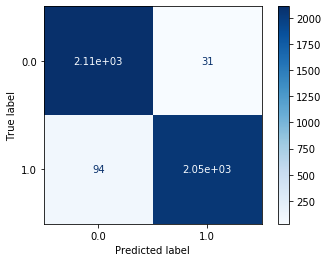

In [108]:
plot_confusion_matrix(pipeline, X_train_resampled, y_train_resampled, cmap=plt.cm.Blues, values_format='.3g')

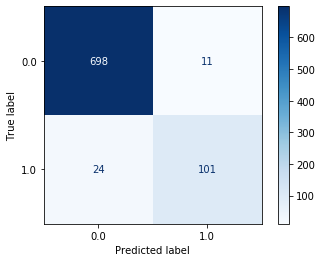

In [109]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

A slight improvement, can GridSearch help us find the right parameters?

In [110]:
#Final GridSearch fit.  WARNING - takes time to run.
'''grid_param = { 'gradientboostingclassifier__max_depth': [3,4,5,6], 
              'gradientboostingclassifier__min_samples_split': [2,3,4,5], 
              'gradientboostingclassifier__min_samples_leaf': [1,2,3],
              'gradientboostingclassifier__n_estimators': [50,100,200]
              } 
grid_search = GridSearchCV(pipeline, grid_param, cv=3, scoring=make_scorer(recall_score), verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)'''

"grid_param = { 'gradientboostingclassifier__max_depth': [3,4,5,6], \n              'gradientboostingclassifier__min_samples_split': [2,3,4,5], \n              'gradientboostingclassifier__min_samples_leaf': [1,2,3],\n              'gradientboostingclassifier__n_estimators': [50,100,200]\n              } \ngrid_search = GridSearchCV(pipeline, grid_param, cv=3, scoring=make_scorer(recall_score), verbose=2)\ngrid_search.fit(X_train_resampled, y_train_resampled)"

In [111]:
grid_param = { 'gradientboostingclassifier__max_depth': [6], 
              'gradientboostingclassifier__min_samples_split': [4], 
              'gradientboostingclassifier__min_samples_leaf': [1],
              'gradientboostingclassifier__n_estimators': [200]
              } 
grid_search = GridSearchCV(pipeline, grid_param, cv=3, scoring=make_scorer(recall_score), verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingclassifier__max_depth=6, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200; total time=   4.3s
[CV] END gradientboostingclassifier__max_depth=6, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200; total time=   4.1s
[CV] END gradientboostingclassifier__max_depth=6, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200; total time=   4.3s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__max_depth': [6],
                         'gradientboostingclassifier__min_samples_leaf': [1],
                         'gradientboostingclassifier__min_samples_split': [4],
                         'gradientboostingclassifier__n_estimators': [200]},
             scoring=make_scorer(recall_score), verbose=2)

In [112]:
grid_search.best_params_

{'gradientboostingclassifier__max_depth': 6,
 'gradientboostingclassifier__min_samples_leaf': 1,
 'gradientboostingclassifier__min_samples_split': 4,
 'gradientboostingclassifier__n_estimators': 200}

In [113]:
best_estimator = grid_search.best_estimator_

In [114]:
best_estimator_train_preds = best_estimator.predict(X_train_resampled)
best_estimator_test_preds = best_estimator.predict(X_test)

In [115]:
print_metrics(y_train_resampled, best_estimator_train_preds)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [116]:
print_metrics(y_test, best_estimator_test_preds)

Precision Score: 0.9454545454545454
Recall Score: 0.832
Accuracy Score: 0.9676258992805755
F1 Score: 0.8851063829787233


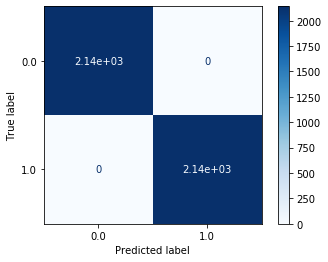

In [117]:
plot_confusion_matrix(best_estimator, X_train_resampled, y_train_resampled, cmap=plt.cm.Blues, values_format='.3g')

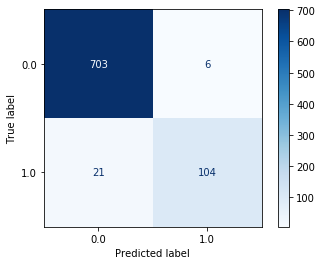

In [118]:
plot_confusion_matrix(best_estimator, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

An accurate model, albeit slightly overfit however still performs comparably well with our Random Forest model, and the two could both be used depending on the business issue we are dealing with.

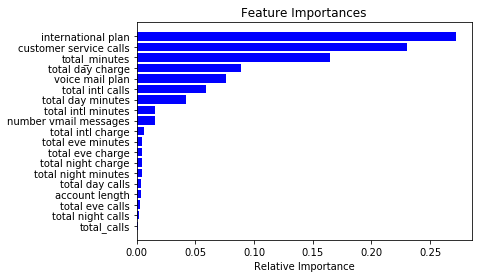

In [119]:
features = X_train.columns
importances = gbt_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Looking at the model's most important features, what can be done to improve these numbers to lower churn?

- Customer Service Calls (keeping customers happy throughout the day to day with minimal interruptions)
- Total day charge/calls/minutes - Looking at possible price reductions on day rates

In [120]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['no churn', 'churn'],
    mode='classification'
)

In [121]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[2], 
    predict_fn=best_estimator.predict_proba
)

In [122]:
exp.show_in_notebook(show_table=True)

LIME predicts not having an international plan as a key factor in churn rate.  While this may not always be applicable to customers, it may be prudent to make sure the business is doing what it can to get customers who at least make substantial international calls on international plans.